# PRML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement
from sympy import *
init_printing()

### Exercise 1.15
The $M$-th order term for a $D$-dimensional polynomial is given by
$$
    \sum_{i_1=1}^D \sum_{i_2=1}^D \dots \sum_{i_M=1}^D w_{i_1,i_2,\ldots,i_M}x_{i_1}x_{i_2}\ldots x_{i_M}
$$
Show that we can rewrite the last expresion by removing redundant terms in the form:
$$
    \sum_{i_1=1}^D \sum_{i_2=1}^{i_1} \dots \sum_{i_M=1}^{i_{M-1}} \tilde w_{i_1,i_2,\ldots,i_M}x_{i_1}x_{i_2}\ldots x_{i_M}
$$

Note: the number of independent parameters is significantly fewer due to the many interchange symmetries of the factor $x_{i_1}x_{i_2}\ldots x_{i_M}$

In [2]:
terms = range(1, 4)
i, j, k = symbols("i j k", integer=True)
what = IndexedBase("\hat{w}")
x = IndexedBase("x")

In [3]:
def extract(iterable: list, elements: list) -> list:
    """
    Extract and convert elements from a multi-level
    list into a 1D list
    """
    for el in iterable:
        if type(el) == list:
            extract(el, elements)
        else:
            elements.append(el)
    return elements

In [4]:
def term2d(i, j): return Indexed("\hat{w}", i, j) * Indexed("x", i) * Indexed("x", j)
def term3d(i, j, k): return Indexed("\hat{w}", i, j, k) * Indexed("x", i) * Indexed("x", j) * Indexed("x", k)

### For $D=2$, $M=3$

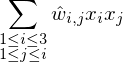

In [5]:
Sum(term2d(i, j), (i, 1, 3), (j, 1, i))

In [6]:
elements = [[term2d(i, j) for j in range(1, i + 1)] for i in terms]
simple_term = sum(extract(elements, []))
simple_term

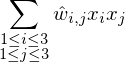

In [17]:
Sum(term2d(i, j), (i, 1, 3), (j, 1, 3))

In [8]:
full_term =  summation(term2d(i, j), (i, 1, 3), (j, 1, 3))
full_term

In [9]:
replacement = {what[x, y]: what[y, x] for x, y in ([2, 1], [3, 1], [3, 2])}
full_term.xreplace(replacement) 

In [10]:
collect(full_term, [x[1]*x[2], x[1] * x[3], x[2] * x[3]])

-------

### For $D=3$, $M=3$

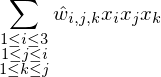

In [11]:
Sum(term3d(i, j, k), (i, 1, 3), (j, 1, i), (k, 1, j))

In [12]:
elements = [[[term3d(i, j, k) for k in range(1, j + 1)] for j in range(1 + i)] for i in terms]
simple_term = sum(extract(elements, []))
simple_term

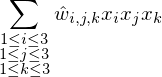

In [13]:
Sum(term3d(i, j, k), (i, 1, 3), (j, 1, 3), (k, 1, 3))

In [14]:
full_term = summation(term3d(i, j, k), (i, 1, 3), (j, 1, 3), (k, 1, 3))
full_term

In [16]:
groupping = [x[a] *  x[b] * x[c] for a, b, c in combinations_with_replacement([1, 2, 3], r=3)]
collect(full_term, groupping, exact=True)

In [26]:
for c in combinations_with_replacement([1,2,3], r=3):
    print(c)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 2)
(1, 2, 3)
(1, 3, 3)
(2, 2, 2)
(2, 2, 3)
(2, 3, 3)
(3, 3, 3)
